# Week 1 Lab

## Question 1

You study the mutual friendship links in your Karate club, when you notice the following: Any set of two people from the club have exactly one friend in common. What does this tell you
about the club? Sketch the friendship network on paper for a club with 15 members. Once you have done that, you should be able to guess which of the NetworkX community graph generators corresponds to it. 

**Write the code to generate the friendship network for the club.**

This is a classic problem in graph theory known as the **Friendship Theorem** (proven by Erdős, Rényi, and Sós in 1966). If every pair of people in a group has exactly one common friend, the network structure is very specific: there must be one "central" person who is friends with everyone else, and everyone else is organized into pairs of friends. This forms a Windmill Graph.

**It tells you that the club has a "Hub and Spoke" or "Star-Triangle" architecture.** There is one "VIP" or "Central Leader" (let's call them Node 0). Every other member is part of a unique triangle that includes the leader. Aside from the leader, no one has any friends outside of their specific 3-person clique.

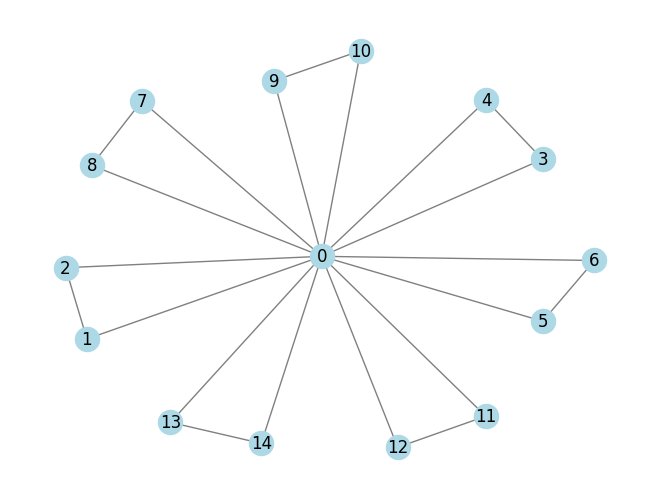

Nodes: 15
Is connected: True


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.windmill_graph(7, 3)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

print(f"Nodes: {G.number_of_nodes()}") # Should be 15
print(f"Is connected: {nx.is_connected(G)}")

**What is a windmill graph?**

A windmill graph, denoted as $Wd(n, k)$, is a specific type of undirected graph constructed by taking $n$ copies of a complete graph $K_k$ (a clique where every node is connected to every other node) and joining them all at a single, shared central vertex. In simpler terms: it looks like a collection of triangles (or larger shapes) that all "pinch" together at one middle point, like the blades of a windmill.

Mathematically, the **Friendship Graph/Theorem** requires an odd number of nodes to be constructed. This is because you must can `n` number of pairs plus the center node, hence, however many pairs there are, the total nodes must be odd.

In NetworkX the arguments taken are `(n,k)` where `n` is the number of cliques and `k` is the size of the cliques, therefore, it is impossible accidentally generate a graph with the wrong number of nodes.

It should be noted, the the **Friendship Graph** is a specific type of **Windmill Graph** where `k=3`. A Windmill Graph as a structure can have any number of `k` (blades), it just matters that each cluster connects to a central node. 

Also, by definition, each blade cluster must be a fully connected network, this is known as a **clique**. Therefore a Windmill Graph has two strict definitions: Intra-Blade Connectivity (High/Complete) & Inter-Blade Connectivity (Low/Sparse/Single).

If the blades were not fully interconnected then the type would be something like a "flower" or "catcus" graph. This is not just a semantics issue, a windmill graph as a very high **Clustering Coefficent**, this makes a popular model for social networks where "bubbles" knows eachother but are only linked elsewhere through a hub structure. 

**What is a spring layout?**

`nx.spring_layout(G)` is an algorithm that calculates a position (x, y coordinate) for every node to make the graph look visually organized and readable. In NetworkX, nodes don't inherently have "coordinates." If you just tell the library to draw a graph, it has no idea where to place the dots on your screen.

**How to Automatically Generate `n` and `k`?**

Recall, `(n,k)` where `n` is the number of cliques and `k` is the size of the cliques.

In the example above we pre-calculated that if we have 15 nodes then we need to have 7 cliques of 3 sized triangles to satisfy our task. `k` equals `3` need to be hardcoded. This is because to satisfy "any set of two people from the club have exactly one friend in common" it must be a triangle. 

For `n`, we know that the structure must have a central person. Given this, we know that the remainder of the triangle must coppucy two more people, therefore, we just need to take the total codes minus the central and divide by two: `(total_members - 1) // 2`

In [48]:
def generate_friendship_tuple(total_members):
    """
    Given a number of total nodes, compute how many cliques are needed given a clique size. 
    """
    if total_members % 2 == 0:
        raise ValueError("Friendship Theorem must be odd")
    
    num_triangles = (total_members - 1) // 2
    
    return (num_triangles, 3)

In [49]:
friendship_tuple = generate_friendship_tuple(15)
print(friendship_tuple)

(7, 3)


In [50]:
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

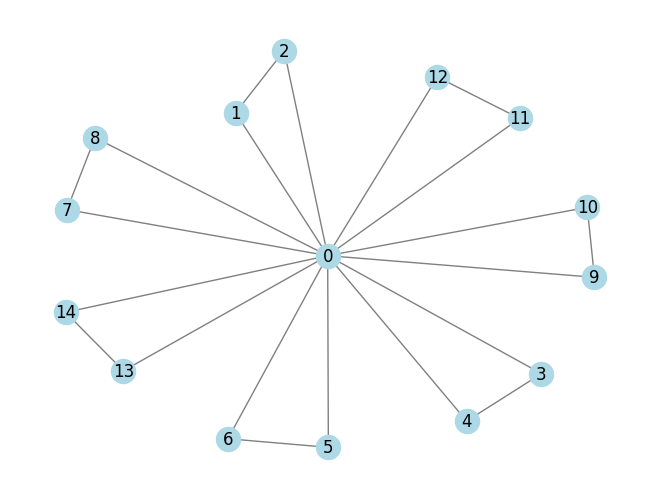

In [51]:
G = nx.windmill_graph(friendship_tuple[0], friendship_tuple[1])
plot_graph(G)

## Question 2

A connected simple graph has a mean degree of $𝑧 ≈ 1.9990123457$. The mean degree of an undirected network is given by $𝑘 = 2𝐿/𝑁$ where $𝐿$ is the number of links and $𝑁$ is the number of nodes. 

**What is the number of nodes?**

(hint: draw some ‘random’ networks to build an intuition as to what an average degree of less than 2 could mean; you could also consult some of the network databases mentioned in the first lecture and see what typical average degrees look like)

---

If the mean degree, given by $\langle k \rangle = \frac{2L}{N}$, is less than 2, then it must be a tree: $(L = N - 1)$

We can prove this by looking at the upper bound where mean degrees is 2. By rearranging the formaula we see that $L = N$, that is, the number of edges equals the number of nodes. Note, a stanard outcome for a grah of exactly 2 mean degrees is just a circle/loop (on average, it could be complex). To obtain an outcome less than 2, the number of edges must be less than the number of nodes. This by definition becomes a tree where $L = N-1$. A tree is the lowest form of network, we cannot have $L = N-2$ this would become disconnected.

$$\frac{2L}{N} = 2 \implies 2L = 2N \implies L = N$$

Given this we can substitue the numerator of the mean degrees equation from $L$ to $(N-1)$: 

$$1.9990123457 = \frac{2(N - 1)}{N}$$

To be a **connected graph**, you must have $L \geq N - 1$ and a shown about, to have a mean degrees of less than two $L < N$. The only thing that satisfies these two contstraints is $L = N - 1$. 

* If $L < N - 1$: Breaks the "connected" graph
* If $L = N$: Gives a mean degrees of 2 which is too high for our brief
* If $L > N$: Again forceds the mean degrees to be >2

Therefore, if we see a mean degrees of a connected graph which is $2<$, we know it is a **tree**. We can use simple algbra to unpack the dimensions of the tree graph. 

1. Set up the equation:

$$1.9990123457 = \frac{2N - 2}{N}$$

2. Multiply both sides by $N$:

$$1.9990123457N = 2N - 2$$

3. Rearrange to solve for $N$:

$$2 = 2N - 1.9990123457N$$

$$2 = N(2 - 1.9990123457)$$

4. Subtract the decimals: 

$$2 = N(0.0009876543)$$

5. Divide to find $N$:

$$N = \frac{2}{0.0009876543}$$

$$N = 2025.0003...$$

Since the number of nodes must be an integer, we round to the nearest whole number:
$N = 2025$

This means the tree has $2025$ Nodes, and therefore has $L = N-1 = 2025-1 = 2024$ edges. 

$$\frac{2 \times 2024}{2025} = \frac{4048}{2025} \approx 1.999012345679...$$

It should be noted, that while every tree has a mean degree below 2. All trees have a unique mean degreee which means we can map every tree to a mean degree and the reversal. The mean degree behaves as an identifer. This is only possible because me were able to substitute $L$ for $N-1$ in the formula. It is not possible to do this mapping for connected networks that are not trees, i.e. with a mean degree $>2$. 

For any tree the mean degree is $\langle k \rangle = \frac{2(N-1)}{N}$ which can be rearranged and simplified to $\langle k \rangle = 2 - \frac{2}{N}$

This is how mean degree varies with size. Close to 1  = the smaller the tree, Closer to 2 = larger tree: 

| Number of Nodes $(N)$ | Calculation $(2−\frac{N}{2}​)$ | Mean Degree $(⟨k⟩)$ |
| :--- | :--- | :--- |
| $2$         | $ 2-\frac{2}{2} $         | $1.0$ |
| $4$         | $ 2-\frac{4}{2} $         | $1.5$ |
| $10$        | $ 2-\frac{10}{2} $        | $1.8$ |
| $100$       | $ 2-\frac{100}{2} $       | $1.98$ |
| $2025$      | $ 2-\frac{2025}{2} $      | $1.999012...$ |
| $1000000$   | $ 2-\frac{1,000,000}{2} $​ | $1.999998...$ |


